<a href="https://colab.research.google.com/github/Jahan1108/Gardening-Services_Analysis/blob/main/Gardening_Services_Analysis_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

step 2:Load the data

In [5]:
df = pd.read_csv('/content/dataset_15_Gardening Services.csv')
output = []
output.append("Exploratory Data Analysis of Gardening Services\n")
output.append("======================\n")


step 3:Explore the data

In [6]:
print(df.head())
output.append(f"First few rows:\n{df.head()}\n")

         Date           Product Region Customer_Type  Quantity    Price  \
0  2024-07-19         Lawn Care  North    Commercial        18  1112.41   
1  2024-11-05  Landscape Design   West    Commercial        14   197.90   
2  2024-11-05      Pest Control   West   Residential        17   273.59   
3  2024-02-28  Landscape Design   East    Commercial        20   791.81   
4  2024-12-25      Pest Control  North    Commercial        11  1921.72   

   Discount   Revenue  
0      0.20  16018.70  
1      0.05   2632.07  
2      0.12   4092.91  
3      0.08  14569.30  
4      0.16  17756.69  


In [7]:
#Get basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1000 non-null   object 
 1   Product        1000 non-null   object 
 2   Region         1000 non-null   object 
 3   Customer_Type  1000 non-null   object 
 4   Quantity       1000 non-null   int64  
 5   Price          1000 non-null   float64
 6   Discount       1000 non-null   float64
 7   Revenue        1000 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 62.6+ KB


In [8]:
print(df.describe())
output.append(f"summary Statistics:\n{df.describe()}\n")

          Quantity        Price     Discount       Revenue
count  1000.000000  1000.000000  1000.000000   1000.000000
mean     10.524000  1009.907960     0.146490   8965.760940
std       5.613995   567.031446     0.085459   7429.161628
min       1.000000    53.480000     0.000000     67.390000
25%       6.000000   524.570000     0.070000   3028.420000
50%      10.000000   994.800000     0.140000   7009.725000
75%      15.000000  1498.042500     0.220000  12933.005000
max      20.000000  1999.280000     0.300000  36969.360000


In [ ]:
Step 4:Clean the data

In [11]:
output.append("Data Cleaning Results:\n")
missing_values = df.isnull().sum()
print(missing_values)
output.append(f"Missing Values:\n{missing_values}\n")
#Fill or drop missing values as necessary
df.dropna(inplace=True) #Drop rows with missing values

#Convert the data column to datetime format
df['Date'] = pd.to_datetime(df['Date'])


Date             0
Product          0
Region           0
Customer_Type    0
Quantity         0
Price            0
Discount         0
Revenue          0
dtype: int64


In [13]:
#Check for duplicates
duplicates = df.duplicated().sum()
output.append(f"Number of Dublicates Droped: {duplicates}\n")
df.drop_duplicates(inplace=True)

Step 5:Analyze the data

In [16]:
#Total revenue from cleaning services
total_revenue = df['Revenue'] .sum()
output.append(f'Total Revenue: ${total_revenue}\n')
print(f'Total Revenue: ${total_revenue}')

Total Revenue: $8965760.94


In [18]:
#average price per Customer_Type Wise
average_price_per_service = df. groupby('Customer_Type')['Price'] .mean()
output.append("Average Price per Customer Type:\n")
output.append(f"{average_price_per_service}\n")
print(average_price_per_service)

Customer_Type
Commercial     1020.060376
Residential     999.550444
Name: Price, dtype: float64


In [20]:
#Total services provided by region
total_services_by_region = df['Region']. value_counts()
output.append("Total Services Provided by Regipon:\n")
output.append(f"{total_services_by_region}\n")
print(total_services_by_region)

Region
South    285
West     251
North    239
East     225
Name: count, dtype: int64


In [21]:
#Total revenue by region
revenue_by_region = df.groupby('Region')['Price'].sum()
output.append("Total Revenue_by_region:\n")
output.append(f"{revenue_by_region}\n")
print(revenue_by_region)

Region
East     227209.14
North    234263.08
South    282730.26
West     265705.48
Name: Price, dtype: float64


Step 6:Visualize the data

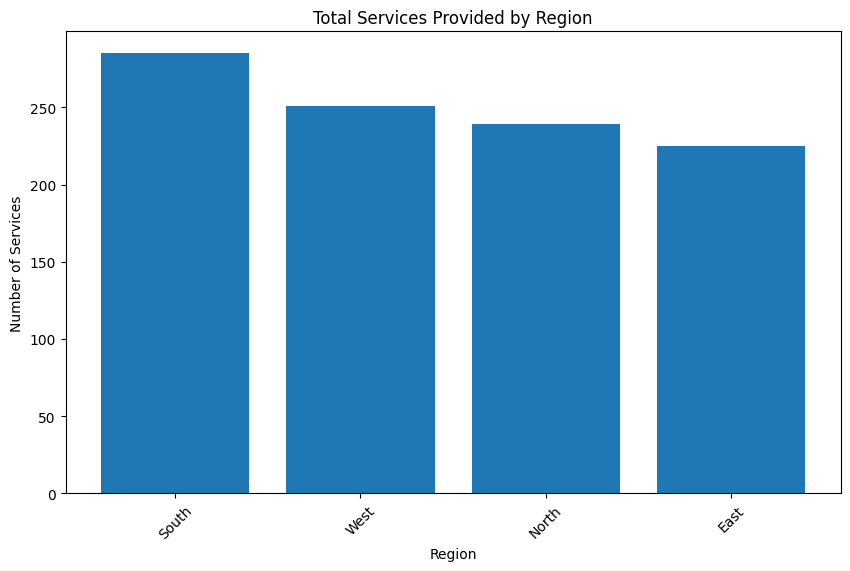

In [22]:
plt.figure(figsize=(10,6))
plt.bar(total_services_by_region.index, total_services_by_region.values)
plt.title('Total Services Provided by Region')
plt.xlabel('Region')
plt.ylabel('Number of Services')
plt.xticks(rotation=45)
plt.savefig('total_services_by_region.png')
plt.show()

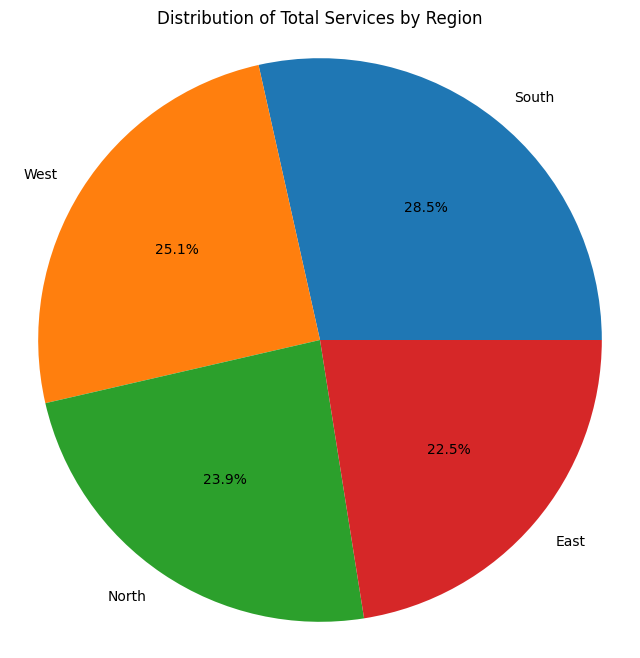

In [24]:
#pic chart for total services by region
plt.figure(figsize=(8,8))
plt.pie(total_services_by_region, labels=total_services_by_region.index,autopct='%1.1f%%')
plt.title('Distribution of Total Services by Region')
plt.axis('equal')
plt.savefig('services_distribution_by_region.png')
plt.show()


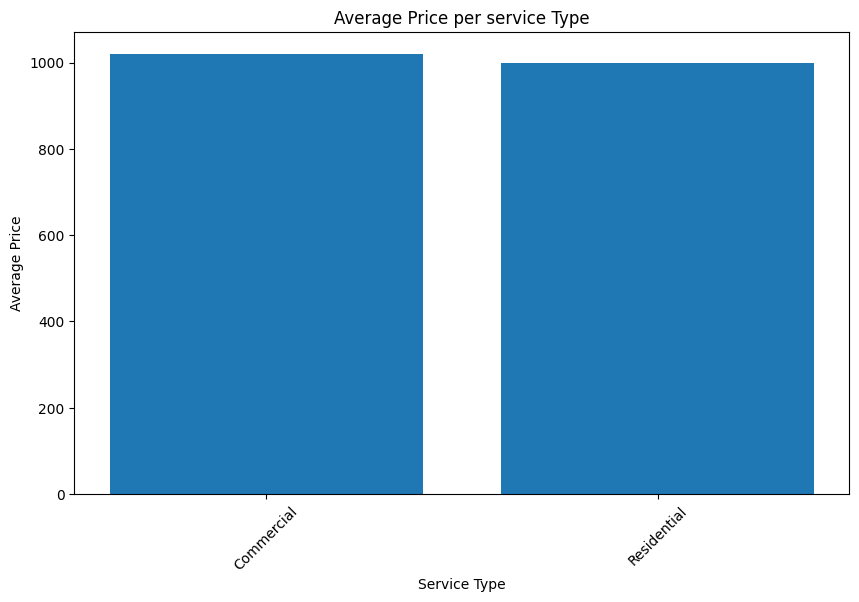

In [27]:
#Bar plot of average price per service type
plt.figure(figsize=(10,6))
plt.bar(average_price_per_service.index,average_price_per_service.values)
plt.title('Average Price per service Type')
plt.xlabel('Service Type')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.savefig('average_price_per_service.png')
plt.show()



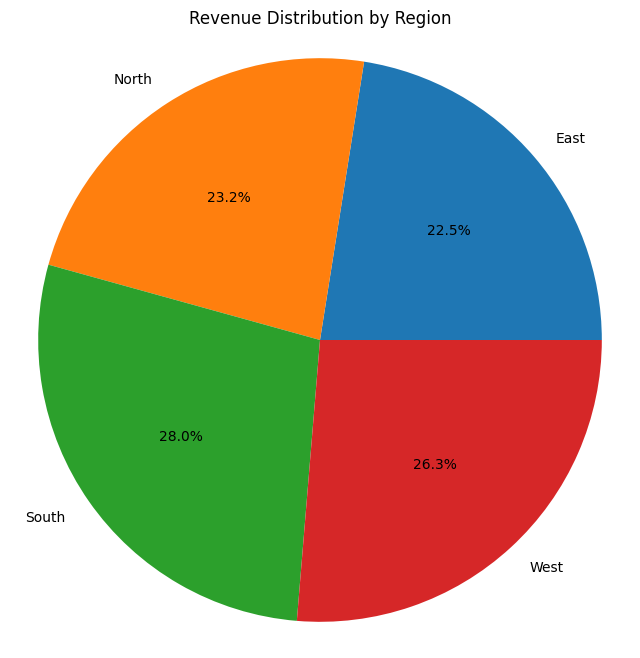

In [29]:
#pic chart for revenue services by type
plt.figure(figsize=(8,8))
plt.pie(revenue_by_region, labels=revenue_by_region.index,autopct='%1.1f%%')
plt.title('Revenue Distribution by Region')
plt.axis('equal')
plt.savefig('revenue_distribution_by_region_pie.png')
plt.show()

Save output in file

In [30]:
#Save output to a text file
with open('analysis_output.txt','w') as f:
  f.writelines(output)